# Create a Custom Circular Cross-section

This example demonstrates how to create a custom circular reinforced concrete cross-section with more advanced reinforcement configurations using the blueprints library.

We'll build upon the basic circular cross-section by adding custom reinforcement patterns, including diagonal reinforcement lines and center rebars.

Let's start building our custom design!

## Import Required Libraries

First, let's import the necessary modules, including some additional ones for custom configurations:

In [1]:
"""Custom reinforced concrete cross-section example."""

from shapely import LineString

from blueprints.materials.concrete import ConcreteMaterial, ConcreteStrengthClass
from blueprints.materials.reinforcement_steel import ReinforcementSteelMaterial, ReinforcementSteelQuality
from blueprints.structural_sections.concrete.rebar import Rebar
from blueprints.structural_sections.concrete.reinforced_concrete_sections.circular import CircularReinforcedCrossSection, ReinforcementByQuantity

## Define Materials

Next, we'll define the concrete and reinforcement steel materials:

In [2]:
# Define a concrete material
concrete = ConcreteMaterial(concrete_class=ConcreteStrengthClass.C35_45)

# Define a reinforcement steel material
steel = ReinforcementSteelMaterial(steel_quality=ReinforcementSteelQuality.B500B)

## Create the Basic Cross-section

Let's start with the same circular cross-section as in the basic example:

In [3]:
# Define a circular reinforced cross-section
cs = CircularReinforcedCrossSection(
    diameter=400,
    cover=35,
    concrete_material=concrete,
)

## Add Standard Longitudinal Reinforcement

First, let's add the standard perimeter reinforcement:

In [4]:
# Add longitudinal reinforcement to the cross-section
cs.add_longitudinal_reinforcement_by_quantity(
    n=5,
    diameter=25,
    material=steel,
)

# Add additional longitudinal reinforcement to the cross-section
cs.add_longitudinal_reinforcement_by_quantity(
    n=5,
    diameter=16,
    material=steel,
    start_angle=45,
)

## Add Stirrups

Add stirrups around the perimeter:

In [5]:
# Add stirrups to the cross-section
cs.add_stirrup_along_perimeter(
    diameter=10,
    distance=150,
    material=steel,
)

Stirrup (id=1)|⌀10/B500B

## Add Custom Diagonal Reinforcement

Now for the custom part - let's add reinforcement along a diagonal line using Shapely geometry:

In [6]:
# Add reinforcement configuration to the cross-section in a diagonal line
linestring = LineString([(-100, 100), (100, 0)])
cs.add_reinforcement_configuration(
    line=linestring,
    configuration=ReinforcementByQuantity(
        diameter=12,
        n=7,
        material=steel,
    ),
)

## Add Center Rebar

Finally, let's add a single rebar at the center of the cross-section:

In [7]:
# Add longitudinal rebar in center
cs.add_longitudinal_rebar(rebar=Rebar(diameter=16, x=0, y=0, material=steel))

Rebar(diameter=16, x=0, y=0, name='Rebar', material=ReinforcementSteelMaterial(steel_quality=<ReinforcementSteelQuality.B500B: 'B500B'>, density=7850.0, reinforcement_type=<ReinforcementType.BARS: 'Bars'>, bar_surface=<ReinforcementBarSurface.RIBBED: 'Ribbed'>, steel_fabrication=<SteelFabrication.HOT_ROLLED: 'Hot-rolled'>, diagram_type=<ReinforcementDiagramType.BILINEAR_NOT_INCLINED: 'Bi-linear with horizontal branch'>, custom_name=None, custom_e_s=None), relative_start_position=0.0, relative_end_position=1.0)

## Review Our Custom Design

At this point, our custom cross-section includes:
- ✅ A 400mm diameter circular concrete cross-section with 35mm cover
- ✅ 5 longitudinal reinforcement bars (25mm diameter) around the perimeter
- ✅ 5 additional reinforcement bars (16mm diameter, offset by 45°)
- ✅ Stirrups (10mm diameter, spaced at 150mm intervals)
- ✅ Custom diagonal reinforcement (7 bars of 12mm diameter along a diagonal line)
- ✅ Center rebar (16mm diameter at the center)

Now let's see our complete custom reinforced concrete cross-section!

## Visualize Our Cross-section

Let's plot the cross-section to see our custom design with all the additional reinforcement:

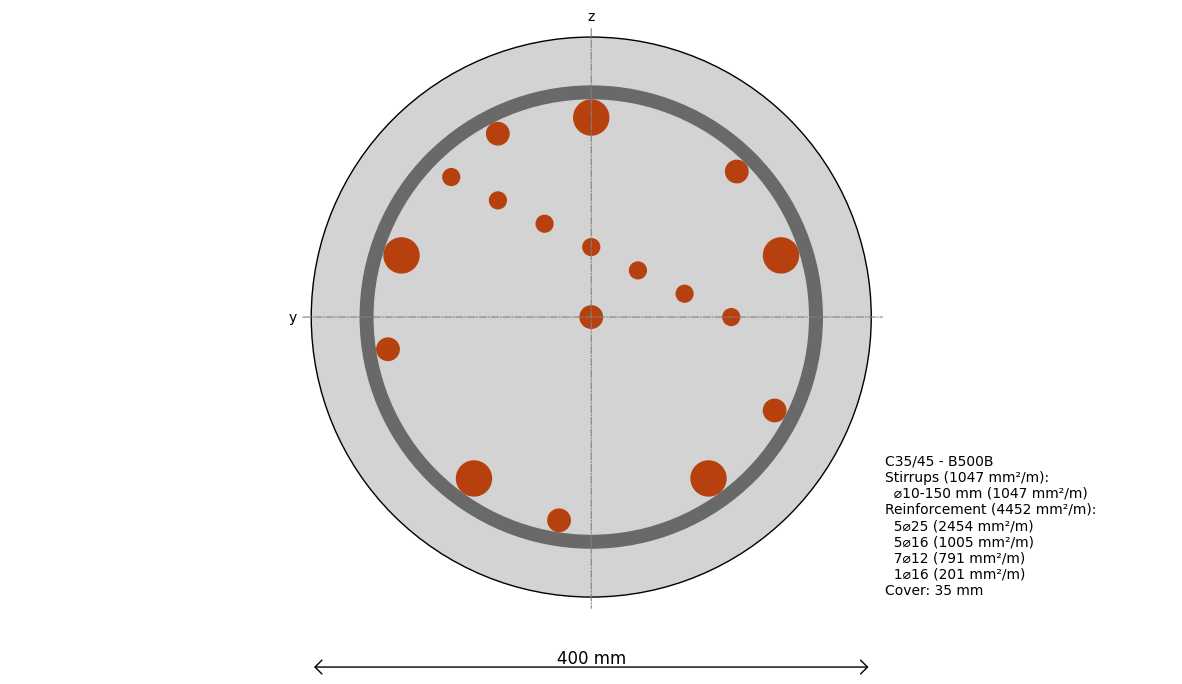

In [8]:
# Plot the cross-section
import matplotlib.pyplot as plt

fig = cs.plot(show=False)  # Create the plot but don't show it yet
plt.show()

## Summary

This example demonstrated advanced customization capabilities:

1. **Basic Setup**: Import modules and define materials
2. **Standard Reinforcement**: Create circular cross-section with perimeter rebars and stirrups
3. **Custom Geometry**: Use Shapely LineString to define diagonal reinforcement paths
4. **Advanced Configuration**: Add reinforcement along custom geometric lines
5. **Precise Placement**: Add individual rebars at specific coordinates
6. **Visualization**: Display the complete custom design

The blueprints library provides flexibility to create any custom reinforcement pattern you need, combining standard methods with geometric precision for complex designs!